<a href="https://colab.research.google.com/github/Eshashr/My-Projects/blob/main/DataMiningTechniquesFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Name: Esha Shrestha

Reference: https://www.kaggle.com/startupsci/titanic-data-science-solutions

https://colab.research.google.com/drive/1UgKT5FlWUeY_WOhrDoKjrzQLaSJlzdv7#scrollTo=beLJdj0x-wI5


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [ ]:
train = pd.read_csv('/content/drive/My Drive/HDS/Datasets/Kaggle Titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test = pd.read_csv('/content/drive/My Drive/HDS/Datasets/Kaggle Titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.describe(include=['O'])

,Name,Ticket,Cabin,Embarked
count,891,891,204,889
unique,891,681,147,3
top,"Leeni, Mr. Fahim (""Philip Zenni"")",1601,B96 B98,S
freq,1,7,4,644


In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


In [ ]:
train[["Fare", "Survived"]].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
...,...,...
103,15.5500,0.0
180,47.1000,0.0
179,46.9000,0.0
178,42.4000,0.0


In [ ]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:


train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]


In [ ]:
train['Pclass'].fillna(train['Pclass'].dropna().mean(), inplace = True)

In [ ]:
train["Pclass"].isnull().any()

False

In [ ]:
train['Sex'].fillna(train['Sex'].dropna().mean(), inplace = True)

In [ ]:
train["Sex"].isnull().any()

False

In [ ]:
train['Fare'].fillna(train['Fare'].dropna().mean(), inplace = True)

In [ ]:
train["Fare"].isnull().any()

False

In [ ]:
train['Parch'].fillna(train['Parch'].dropna().mean(), inplace = True)

In [ ]:
train["Parch"].isnull().any()

False

In [ ]:
test['Pclass'].fillna(test['Pclass'].dropna().mean(), inplace = True)

In [ ]:
test["Pclass"].isnull().any()

False

In [ ]:
test['Fare'].fillna(test['Fare'].dropna().mean(), inplace = True)

In [ ]:
test["Fare"].isnull().any()

False

In [ ]:
test['Parch'].fillna(test['Parch'].dropna().mean(), inplace = True)

In [ ]:
test["Parch"].isnull().any()

False

In [ ]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# Assign ordinal into 4 fare bands
train.loc[train['Fare'] <= 15.6, 'Fare'] = 0
train.loc[(train['Fare'] > 15.6) & (train['Fare'] <= 31.19), 'Fare'] = 1
train.loc[(train['Fare'] > 31.19) & (train['Fare'] <= 46.79), 'Fare'] = 2
train.loc[train['Fare'] > 46.79, 'Fare'] = 3

# Convert ordinal Fare into integer
train['Fare'] = train['Fare'].astype('int')
train['Fare'].dtype

dtype('int64')

In [ ]:
train.loc[train['Parch'] <= 0.5, 'Parch'] = 0
train.loc[(train['Parch'] > 0.5) & (train['Parch'] <= 1), 'Parch'] = 1
train.loc[(train['Parch'] > 1, 'Parch')]= 2

# Convert ordinal Fare into integer
train['Parch'] = train['Parch'].astype('int')
train['Parch'].dtype

dtype('int64')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,3,C
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,3,S
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,0,S


In [ ]:
test.loc[test['Fare'] <= 15.6, 'Fare'] = 0
test.loc[(test['Fare'] > 15.6) & (test['Fare'] <= 31.19), 'Fare'] = 1
test.loc[(test['Fare'] > 31.19) & (test['Fare'] <= 46.79), 'Fare'] = 2
test.loc[test['Fare'] > 46.79, 'Fare'] = 3

# Convert ordinal Fare into integer
test['Fare'] = test['Fare'].astype('int')
test['Fare'].dtype

dtype('int64')

In [ ]:
test.loc[test['Parch'] <= 0.5, 'Parch'] = 0
test.loc[(test['Parch'] > 0.5) & (test['Parch'] <= 1), 'Parch'] = 1
test.loc[(test['Parch'] > 1, 'Parch')]= 2

# Convert ordinal Fare into integer
test['Parch'] = test['Parch'].astype('int')
test['Parch'].dtype

dtype('int64')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,0,S


In [ ]:
features = train.loc[:,["Pclass","Age","SibSp","Parch","Fare" ]]
targets = train.loc[:,"Survived"]
test_features = test.loc[:,["Pclass","Age","SibSp","Parch","Fare" ]]
features.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,0
1,1,38.0,1,0,3
2,3,26.0,0,0,0
3,1,35.0,1,0,3
4,3,35.0,0,0,0


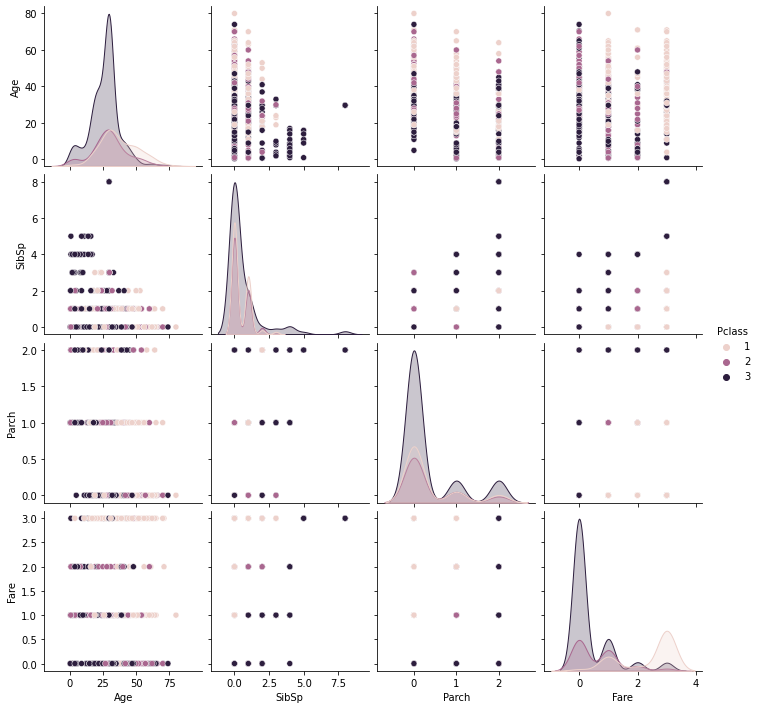

In [ ]:
import seaborn as sns
sns.pairplot(features, hue='Pclass')

In [ ]:
forest = RandomForestClassifier(ccp_alpha=0.01, max_features=5)
forest.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(forest, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.211048
score_time         0.018844
test_accuracy      0.713904
train_accuracy     0.736542
test_precision     0.652223
train_precision    0.699794
test_recall        0.529795
train_recall       0.556244
test_f1            0.581465
train_f1           0.618412
dtype: float64

In [ ]:
forest = RandomForestClassifier(ccp_alpha=0.02, max_features=5)
forest.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(forest, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.350254
score_time         0.031153
test_accuracy      0.684703
train_accuracy     0.701468
test_precision     0.608238
train_precision    0.634131
test_recall        0.532566
train_recall       0.545320
test_f1            0.558955
train_f1           0.582464
dtype: float64

In [ ]:
forest = RandomForestClassifier(ccp_alpha=0.005, max_features=5)
forest.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(forest, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.209371
score_time         0.017126
test_accuracy      0.725158
train_accuracy     0.760109
test_precision     0.695615
train_precision    0.750809
test_recall        0.506394
train_recall       0.563576
test_f1            0.583970
train_f1           0.642558
dtype: float64

In [ ]:
forest = RandomForestClassifier(ccp_alpha=0.01, max_features=5)
forest.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(forest, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.214777
score_time         0.016938
test_accuracy      0.713916
train_accuracy     0.735979
test_precision     0.655401
train_precision    0.692080
test_recall        0.535550
train_recall       0.563584
test_f1            0.587872
train_f1           0.620484
dtype: float64

In [ ]:
# Finally apply the model to predict values on the test set
fitmodel = forest.fit(features, targets)
preds = fitmodel.predict(test_features)
# Build a result set with the passengerid and the predicted survived column
result = pd.DataFrame(test["PassengerId"])
result["Survived"] = preds
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
result.to_csv('result.csv', sep=",", index = False)